In [121]:
#www.kaggle.com/competitions/playground-series-s4e11/overview/$citation

In [122]:
#pip install xgboost

In [123]:
#pip install nbstripout

In [124]:
#import packages

#EDA / Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data modeling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

#for github
import nbstripout

#for packaging model
import joblib

# EDA

In [125]:
#import training data and start exploratory data analysis
data = pd.read_csv('train.csv')

In [126]:
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Data Dictionary

In [127]:
#Explain all the columns and their data types



In [128]:
data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [129]:
data.count()

id                                       140700
Name                                     140700
Gender                                   140700
Age                                      140700
City                                     140700
Working Professional or Student          140700
Profession                               104070
Academic Pressure                         27897
Work Pressure                            112782
CGPA                                      27898
Study Satisfaction                        27897
Job Satisfaction                         112790
Sleep Duration                           140700
Dietary Habits                           140696
Degree                                   140698
Have you ever had suicidal thoughts ?    140700
Work/Study Hours                         140700
Financial Stress                         140696
Family History of Mental Illness         140700
Depression                               140700
dtype: int64

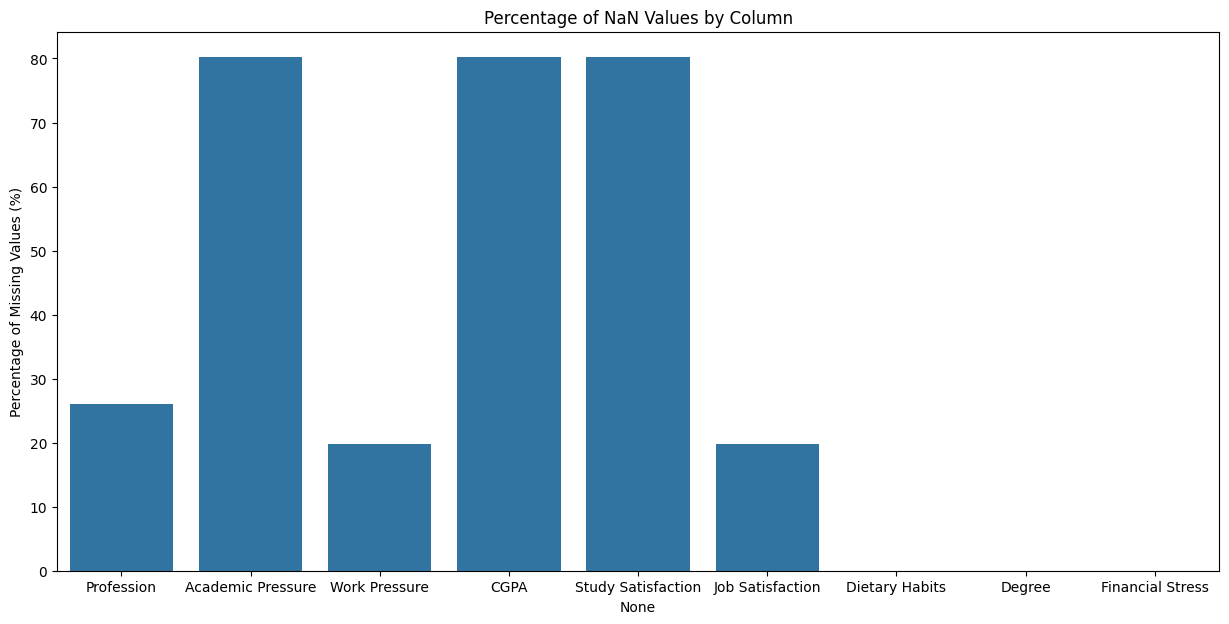

In [130]:
nan_cols = data.columns[data.isna().any()]
null_col_values_focus = data[nan_cols].isna().mean() * 100

plt.figure(figsize=(15, 7))
sns.barplot(x=null_col_values_focus.index, y=null_col_values_focus.values)
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Percentage of NaN Values by Column')
plt.show()

In [131]:
data.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

### Data Visulization

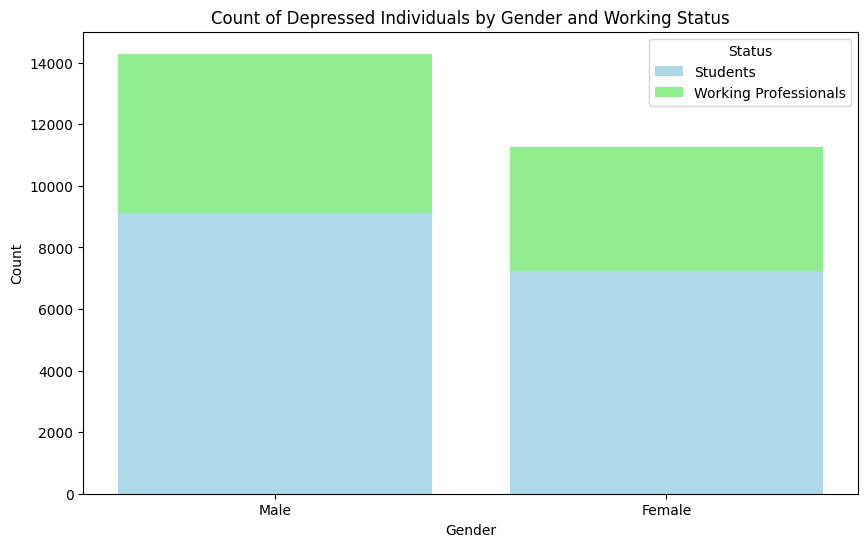

In [132]:
#number of depressed individuals and whether they are male or female and whether they are a working professional or are in schoool. #Help from ChatGPT

data_dep_vis = data[['Depression', 'Gender', 'Working Professional or Student']]

depressed_data = data_dep_vis[data_dep_vis['Depression'] == 1]

# Aggregate counts by gender and working status
student_counts = depressed_data[depressed_data['Working Professional or Student'] == 'Student']['Gender'].value_counts()
pro_counts = depressed_data[depressed_data['Working Professional or Student'] == 'Working Professional']['Gender'].value_counts()

# Align indexes for stacking (handle missing values with `.reindex`)
genders = ['Male', 'Female']
student_counts = student_counts.reindex(genders, fill_value=0)
pro_counts = pro_counts.reindex(genders, fill_value=0)

# Bar positions
bar_positions = np.arange(len(genders))

# Plot stacked bars
plt.figure(figsize=(10, 6))
plt.bar(bar_positions, student_counts, label='Students', color='lightblue')
plt.bar(bar_positions, pro_counts, bottom=student_counts, label='Working Professionals', color='lightgreen')

# Customize the chart
plt.title("Count of Depressed Individuals by Gender and Working Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(bar_positions, genders)  # Set gender labels on x-axis
plt.legend(title="Status")
plt.show()

The purpose of this graph is to show how the working status and genders are represented in our data. As we can see, although males are more highly represented in this data, we can still see that the distrubtion of male and female is close while the working status seems to be more evenly split with a favortism towards students. 

In [133]:
#age distribution of depressed individuals

data['Age'].describe()

count    140700.000000
mean         40.388621
std          12.384099
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

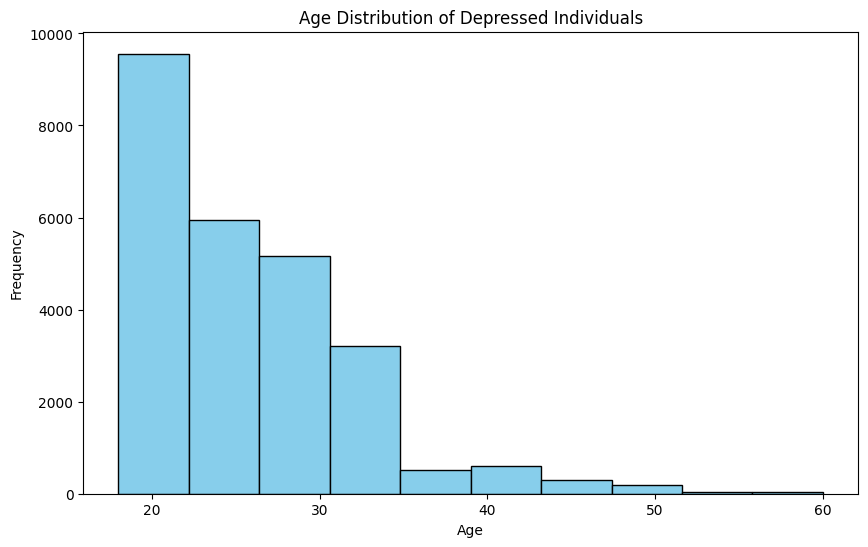

In [134]:
data_age_hist = data[data['Depression'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(data_age_hist['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Depressed Individuals")
plt.show()

In [135]:
#histogram of study / work hours for depressed individuals

data['Work/Study Hours'].describe()

count    140700.000000
mean          6.252679
std           3.853615
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Work/Study Hours, dtype: float64

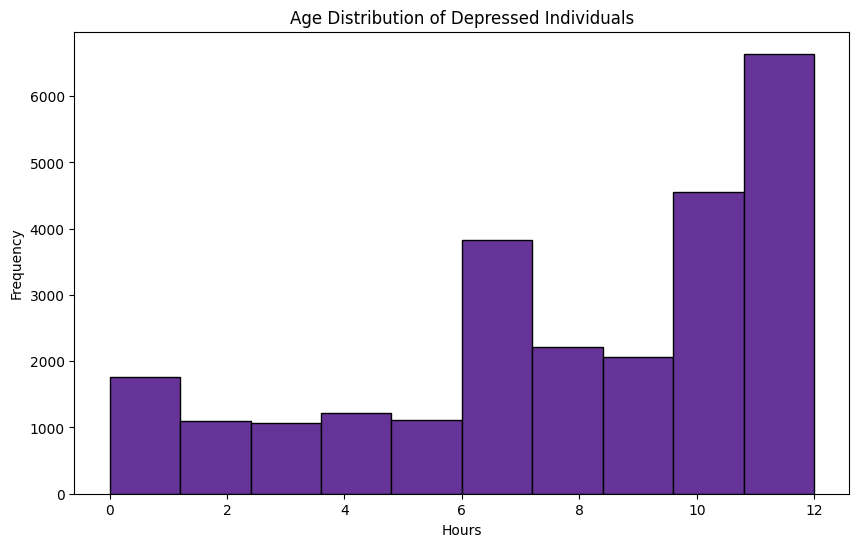

In [136]:
data_hours_hist = data[data['Depression'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(data_hours_hist['Work/Study Hours'], bins=10, color='rebeccapurple', edgecolor='black')
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Age Distribution of Depressed Individuals")
plt.show()

### Data Cleaning

In [137]:
#When working with predictive modeling, you cannot use null values. There are 3 different approaches we can take to mitigate these values.
#The first option would be to completely wipe out all rows that contain at least 1 null value. This should be a last resort approach as we want to be 
#able to use as much data as possible for the model. The second option would be to find the mean or median of the column (if numeric) and fill in
#the nulls with that average value. This option is best if you have a large percentage of null values, but can throw off other statistics and models.
#Lastly, similarly with the average value method, we can fill in the nulls randomly. Even character values could be randomized if there is a unique set
#of different values. Again, this is not ideal unless there is a large portion of data missing. 

#Below we will determine the best route. 

In [138]:
#profession unique values
data['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

Based on the values here, we could easily fill in the 'nan' values with a random profession, but considering the context I plan to fill in the nan values with something like "unemployeed" or "no profession". 

In [139]:
#academic pressure unique values
data['Academic Pressure'].unique()

array([nan,  5.,  2.,  3.,  4.,  1.])

Looks like the academic pressure may be a great depressive indicator, but we do have some nan values. Considering the context I believe we can fill in the 'nan' values with 0 as this would mean an individual has no academic pressure. 

In [140]:
#work pressure unique values
data['Work Pressure'].unique()

array([ 5.,  4., nan,  1.,  2.,  3.])

Similary with the academic pressure, we should be able to replace those 'nan' values with 0.

In [141]:
#Cumulative Grade Point Average unique values
data['CGPA'].unique()

array([    nan,  8.97  ,  5.9   ,  7.03  ,  5.59  ,  8.13  ,  5.7   ,
        9.54  ,  8.04  ,  9.79  ,  8.38  ,  6.1   ,  7.04  ,  8.52  ,
        5.64  ,  8.58  ,  6.51  ,  7.25  ,  7.83  ,  9.93  ,  8.74  ,
        6.73  ,  5.57  ,  8.59  ,  7.1   ,  6.08  ,  5.74  ,  9.86  ,
        6.7   ,  6.21  ,  5.87  ,  6.37  ,  9.72  ,  5.88  ,  9.56  ,
        6.99  ,  5.24  ,  9.21  ,  7.85  ,  6.95  ,  5.86  ,  7.92  ,
        9.66  ,  8.94  ,  9.71  ,  7.87  ,  5.6   ,  7.9   ,  5.46  ,
        6.79  ,  8.7   ,  7.38  ,  8.5   ,  7.09  ,  9.82  ,  8.89  ,
        7.94  ,  9.11  ,  6.75  ,  7.53  ,  9.49  ,  9.01  ,  7.64  ,
        5.27  ,  6.    ,  9.44  ,  5.75  ,  7.51  ,  9.05  ,  6.38  ,
        8.95  ,  9.88  ,  5.32  ,  6.27  ,  7.7   ,  8.1   ,  9.59  ,
        8.96  ,  5.51  ,  7.43  ,  8.79  ,  9.95  ,  5.37  ,  6.86  ,
        8.32  ,  9.74  ,  5.66  ,  7.48  ,  8.23  ,  8.81  ,  6.03  ,
        5.56  ,  5.68  ,  5.14  ,  7.61  ,  6.17  ,  8.17  ,  9.87  ,
        8.75  ,  6.1

In [142]:
top_w_nan_gpa = data[data['CGPA'].isna() & data['Working Professional or Student'] == 'Student']
top_w_nan_gpa.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


The CGPA or Cumulative Grade Point Average is a good indicator of the students overall academic performance. The second section of code tells us that when the CGPA score is null, we have a working professional. This means we should be able to fill all the null values with 0 without disturbing any of the student's GPA scores.

In [143]:
data['Working Professional or Student'].isnull().sum()

0

In [144]:
#Study Satisfaction unique values
data['Study Satisfaction'].unique()

array([nan,  2.,  5.,  3.,  4.,  1.])

In [145]:
#Job Satisfaction unique values
data['Job Satisfaction'].unique()

array([ 2.,  3., nan,  1.,  5.,  4.])

In [146]:
#Dietary habits unique values
data['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

Based on these values, we will have to dig in more to discover the best route with this column or decide that it may not be useful. 

In [147]:
#work study hours
data['Work/Study Hours'].isnull().sum()
#no null values within this work/study column

0

In [148]:
#Degree unique values
data['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [149]:
#Degree unique value counts top
degree_nans = data['Degree'].value_counts(ascending=False)
degree_nans.head(10)

Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
Name: Degree, dtype: int64

In [150]:
#Degree unique value counts bottom
degree_nans = data['Degree'].value_counts(ascending=True)
degree_nans.head(10)

Vrinda      1
Pihu        1
M_Tech      1
24          1
CGPA        1
Brithika    1
ACA         1
B.B.Arch    1
7.06        1
B BA        1
Name: Degree, dtype: int64

Due to the variety of degrees, assigning these unique ids for modeling will come in handy later on. 

In [151]:
data['Degree'].isnull().sum()

2

In [152]:
#Financial Stress unique values
data['Financial Stress'].unique()

array([ 2.,  3.,  1.,  4.,  5., nan])

Thankfully this stress indicator is farely clean and we should be able to replace the nan values with 0.

In [153]:
#start here:
#work on cleaning out nan values across the board or figuring out which columns we want to use or "save" for modeling


#also next for cleaning will be trying to get the sleep hours out of the column 

In [154]:
#sleep duration unique research
data['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [155]:
sleep_data = data['Sleep Duration'].value_counts(ascending=False)
sleep_data

Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: Sleep Duration, dtype:

Again, we have few options on how to deal with these values. In order to make them useful for modeling, we will need to normalize these values. The pro here is that there a bulk of the values are set by 4 different values. The con here is that another 32 values need to be parsed and assessed on how to properly assign a numeric value. 

I think the best approach to start would be to do "case when" for each value we see here and give it a best guess. Example 55-66 maybe just average to 60.5 hours or round down to 60. Or moderate we could do 6 hours? Some of the odd-ball string values we can just put in an average. 

In [156]:
#Have you ever had suicidal thoughts
data['Have you ever had suicidal thoughts ?'].isnull().sum()

0

In [157]:
#Family history question
data['Family History of Mental Illness'].isnull().sum()

0

### Cleanup

In [158]:
#replacing all nan values with 0 for these columns:

clean_data = data
clean_data['CGPA'] = clean_data['CGPA'].fillna(0)
clean_data['Academic Pressure'] = clean_data['Academic Pressure'].fillna(0)
clean_data['Work Pressure'] = clean_data['Work Pressure'].fillna(0)
clean_data['Study Satisfaction'] = clean_data['Study Satisfaction'].fillna(0)
clean_data['Job Satisfaction'] = clean_data['Job Satisfaction'].fillna(0)
clean_data['Financial Stress'] = clean_data['Financial Stress'].fillna(0)

In [159]:
clean_data = clean_data[(clean_data['Sleep Duration'] == 'Less than 5 hours') | (clean_data['Sleep Duration'] == '7-8 hours') | (clean_data['Sleep Duration'] == 'More than 8 hours') | (clean_data['Sleep Duration'] == '5-6 hours')]

In [160]:
#The goal here was to take our hottest sleeping values and assign them a number to be better for training. 
#This could be up for interpretation as to which values should be assigned higher or lower, but the goal really is to have the model
    #be able to make distictions between the different sleeping hours individuals get

clean_data.loc[clean_data['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 1  # Bad
clean_data.loc[clean_data['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 2        # Okay
clean_data.loc[clean_data['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 3        # Best
clean_data.loc[clean_data['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 4 # Okay


In [161]:
#changing binary values to 0s and 1s
clean_data.loc[clean_data['Gender'] == 'Male', 'Gender'] = 1
clean_data.loc[clean_data['Gender'] == 'Female', 'Gender'] = 0

clean_data.loc[clean_data['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
clean_data.loc[clean_data['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0

clean_data.loc[clean_data['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
clean_data.loc[clean_data['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0

clean_data.loc[clean_data['Working Professional or Student'] == 'Working Professional', 'Working Professional or Student'] = 0
clean_data.loc[clean_data['Working Professional or Student'] == 'Student', 'Working Professional or Student'] = 1

In [162]:
clean_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,0,49.0,Ludhiana,0,Chef,0.0,5.0,0.00,0.0,2.0,4,Healthy,BHM,0,1.0,2.0,0,0
1,1,Vivan,1,26.0,Varanasi,0,Teacher,0.0,4.0,0.00,0.0,3.0,1,Unhealthy,LLB,1,7.0,3.0,0,1
2,2,Yuvraj,1,33.0,Visakhapatnam,1,NaN,5.0,0.0,8.97,2.0,0.0,2,Healthy,B.Pharm,1,3.0,1.0,0,1
3,3,Yuvraj,1,22.0,Mumbai,0,Teacher,0.0,5.0,0.00,0.0,1.0,1,Moderate,BBA,1,10.0,1.0,1,1
4,4,Rhea,0,30.0,Kanpur,0,Business Analyst,0.0,1.0,0.00,0.0,1.0,2,Unhealthy,BBA,1,9.0,4.0,1,0


# Modeling

In [163]:
#our first attempt will use the already clean data to make a Random Forest model

#in our second attempt we will want to include city, profession, dietary habits (needs cleaning) and degree.
    #I do not believe adding name will do much

### Normalization

In [164]:
scaler = MinMaxScaler()
#columns that are non binary (not 1s or 0s)
numeric_columns = [ 'Age', 'Academic Pressure', 
                           'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 
                           'Work/Study Hours', 'Financial Stress']
clean_data_norm = scaler.fit_transform(clean_data[numeric_columns])

clean_data_norm = pd.DataFrame(clean_data_norm, 
                           columns=numeric_columns, 
                           index=clean_data.index)

In [165]:
x_vals_add_in = ['Gender', 'Working Professional or Student',  'Have you ever had suicidal thoughts ?',
                        'Family History of Mental Illness']
y_data = clean_data['Depression']


In [166]:
X_data = pd.concat([clean_data_norm, clean_data[x_vals_add_in]], axis=1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=10)


### Random Forest

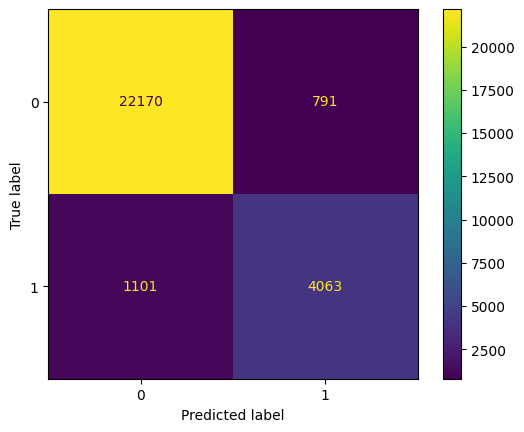

In [168]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [169]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9327288888888889


In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22961
           1       0.84      0.79      0.81      5164

    accuracy                           0.93     28125
   macro avg       0.89      0.88      0.89     28125
weighted avg       0.93      0.93      0.93     28125



93.3% accuracy is pretty strong.

Accuracy: 0.928997867803838


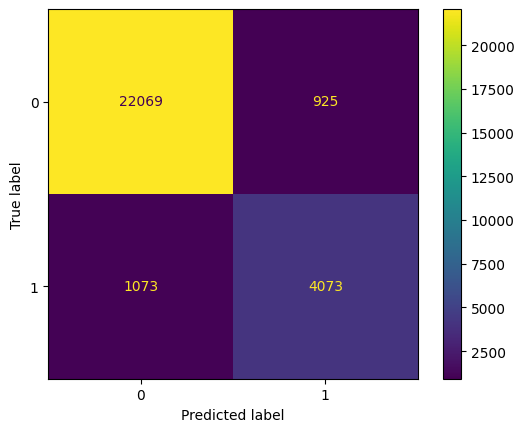

In [171]:
#the test sets we will run may not have the same sleep values we tested on.
#before trying to get a new solution that looks at the numberse in the sleep column, I will remove it from the model first.

clean_data = data

clean_data.loc[clean_data['Gender'] == 'Male', 'Gender'] = 1
clean_data.loc[clean_data['Gender'] == 'Female', 'Gender'] = 0

clean_data.loc[clean_data['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
clean_data.loc[clean_data['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0

clean_data.loc[clean_data['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
clean_data.loc[clean_data['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0

clean_data.loc[clean_data['Working Professional or Student'] == 'Working Professional', 'Working Professional or Student'] = 0
clean_data.loc[clean_data['Working Professional or Student'] == 'Student', 'Working Professional or Student'] = 1

clean_data = data
clean_data['CGPA'] = clean_data['CGPA'].fillna(0)
clean_data['Academic Pressure'] = clean_data['Academic Pressure'].fillna(0)
clean_data['Work Pressure'] = clean_data['Work Pressure'].fillna(0)
clean_data['Study Satisfaction'] = clean_data['Study Satisfaction'].fillna(0)
clean_data['Job Satisfaction'] = clean_data['Job Satisfaction'].fillna(0)
clean_data['Financial Stress'] = clean_data['Financial Stress'].fillna(0)

scaler = MinMaxScaler()
#columns that are non binary (not 1s or 0s)
numeric_columns = [ 'Age', 'Academic Pressure', 
                           'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
                           'Work/Study Hours', 'Financial Stress']
clean_data_norm = scaler.fit_transform(clean_data[numeric_columns])

clean_data_norm = pd.DataFrame(clean_data_norm, 
                           columns=numeric_columns, 
                           index=clean_data.index)

x_vals_add_in = ['Gender', 'Working Professional or Student',  'Have you ever had suicidal thoughts ?',
                        'Family History of Mental Illness']
y_data = clean_data['Depression']

X_data = pd.concat([clean_data_norm, clean_data[x_vals_add_in]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=10)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Bring in test data to produce a contest submission

In [172]:
submission_test = pd.read_csv('test.csv')

In [173]:
submission_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [174]:
submission_test.shape

(93800, 19)

In [175]:
#start here

#need to figure out how to run this test data through our cleaning so that it can go through the model 
#then we need to figure out how to get the results by id for the submission

In [176]:
submission_test['Working Professional or Student'].isnull().sum()

0

In [177]:
submission_test[submission_test.apply(lambda r: r.str.contains('Meerut').any(), axis=1)]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
16,140716,Rudra,Male,52.0,Meerut,Working Professional,Digital Marketer,NaN,3.0,NaN,NaN,3.0,7-8 hours,Healthy,MA,Yes,4.0,2.0,No
45,140745,Abhishek,Male,18.0,Meerut,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,More than 8 hours,Unhealthy,Class 12,No,9.0,2.0,Yes
79,140779,Aarav,Male,25.0,Meerut,Student,NaN,1.0,NaN,9.41,5.0,NaN,5-6 hours,Moderate,B.Com,Yes,7.0,2.0,No
123,140823,Rudra,Male,52.0,Meerut,Working Professional,Digital Marketer,NaN,4.0,NaN,NaN,2.0,Less than 5 hours,Moderate,MA,No,4.0,3.0,No
173,140873,Pranav,Male,32.0,Meerut,Student,NaN,1.0,NaN,7.88,3.0,NaN,Less than 5 hours,Unhealthy,B.Arch,No,10.0,5.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93591,234291,Ritik,Male,33.0,Meerut,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,MSc,Yes,7.0,3.0,No
93617,234317,Ritvik,Male,57.0,Meerut,Working Professional,Lawyer,NaN,3.0,NaN,NaN,4.0,7-8 hours,Moderate,LLM,Yes,8.0,1.0,No
93685,234385,Sai,Male,22.0,Meerut,Student,NaN,2.0,NaN,9.93,4.0,NaN,Less than 5 hours,Healthy,MCA,No,5.0,4.0,Yes
93709,234409,Raghav,Male,51.0,Meerut,Working Professional,Doctor,NaN,1.0,NaN,NaN,4.0,5-6 hours,Healthy,B.Pharm,No,4.0,2.0,No


In [178]:
submission_test['Sleep Duration'].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       '0', 'Meerut', '9-5 hours', '6-7 hours', '60-65 hours', 'Vivan',
       '3-4 hours', '1-6 hours', '9-5', 'Unhealthy', '8-9 hours',
       '4-5 hours', 'than 5 hours', '9-6 hours', '1-2 hours',
       '8-89 hours', 'Have_you_ever_had_suicidal_thoughts', '20-21 hours',
       '10-6 hours', '1-3 hours', '6 hours', '50-75 hours', '4-6 hours',
       '2-3 hours', '9-11 hours', '9-10 hours', '3-6 hours'], dtype=object)

In [179]:
# process the test set.

def preprocess(test_data):

    pre_cleaned = test_data

    #fill nans with 0 
    test_data['CGPA'] = test_data['CGPA'].fillna(0)
    test_data['Academic Pressure'] = test_data['Academic Pressure'].fillna(0)
    test_data['Work Pressure'] = test_data['Work Pressure'].fillna(0)
    test_data['Study Satisfaction'] = test_data['Study Satisfaction'].fillna(0)
    test_data['Job Satisfaction'] = test_data['Job Satisfaction'].fillna(0)
    test_data['Financial Stress'] = test_data['Financial Stress'].fillna(0)

    # #sleeping items to focus on
    # test_data = test_data[(test_data['Sleep Duration'] == 'Less than 5 hours') 
    #             | (test_data['Sleep Duration'] == '7-8 hours') | (test_data['Sleep Duration'] == 'More than 8 hours') 
    #             | (test_data['Sleep Duration'] == '5-6 hours')]

    # #clean up sleeping column
    # test_data.loc[test_data['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 1  # Bad
    # test_data.loc[test_data['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 2        # Okay
    # test_data.loc[test_data['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 3        # Best
    # test_data.loc[test_data['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 4 # Okay

    #convert string columns to binary
    test_data.loc[test_data['Gender'] == 'Male', 'Gender'] = 1
    test_data.loc[test_data['Gender'] == 'Female', 'Gender'] = 0
    
    test_data.loc[test_data['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
    test_data.loc[test_data['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
    
    test_data.loc[test_data['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
    test_data.loc[test_data['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
    
    test_data.loc[test_data['Working Professional or Student'] == 'Working Professional', 'Working Professional or Student'] = 0
    test_data.loc[test_data['Working Professional or Student'] == 'Student', 'Working Professional or Student'] = 1

    #normalize the dataset
    scaler = MinMaxScaler()
    #columns that are non binary (not 1s or 0s)
    numeric_columns = [ 'Age', 'Academic Pressure', 
                               'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
                               'Work/Study Hours', 'Financial Stress']
    clean_data_norm = scaler.fit_transform(test_data[numeric_columns])
    
    clean_data_norm = pd.DataFrame(clean_data_norm, 
                               columns=numeric_columns, 
                               index=test_data.index)

    #columns that are binary (1 or 0)
    x_vals_add_in = ['Gender', 'Working Professional or Student',  'Have you ever had suicidal thoughts ?',
                            'Family History of Mental Illness']

    #combine normalized data and cleaned data
    X_data = pd.concat([clean_data_norm, test_data[x_vals_add_in]], axis=1)

    #ready to run processed X variable data
    processed_test_data = X_data
    
    return processed_test_data


preprocess(submission_test)
    

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender,Working Professional or Student,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,0.833333,0.0,0.4,0.000,0.0,1.0,0.750000,0.50,1,0,0,1
1,0.952381,0.0,0.4,0.000,0.0,0.8,0.500000,0.75,0,0,0,0
2,0.833333,0.0,0.8,0.000,0.0,0.2,1.000000,0.75,1,0,1,0
3,0.119048,1.0,0.0,0.684,0.2,0.0,0.833333,0.75,0,1,1,0
4,0.690476,0.0,1.0,0.000,0.0,1.0,0.250000,0.75,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0.738095,0.0,0.6,0.000,0.0,1.0,0.166667,0.25,0,0,1,1
93796,0.261905,0.0,1.0,0.000,0.0,0.2,0.916667,0.50,1,0,1,1
93797,0.142857,0.2,0.0,0.751,0.8,0.0,0.583333,0.00,1,1,0,0
93798,0.119048,0.0,0.8,0.000,0.0,0.4,0.583333,1.00,0,0,1,1


In [180]:
predictions = rf.predict(preprocess(submission_test))

ids = submission_test['id']

submission = pd.DataFrame({
    'id': ids,
    'prediction': predictions
})

submission.to_csv('submission.csv', index=False)

In [183]:
# Submitted on 11/17/24
# Score: 0.93171 
# Place: 1223